# Predicting crossfit lift

## Project Overview

CrossFit is a high-intensity fitness program that combines elements of weightlifting, cardio, and gymnastics. It aims to improve overall physical fitness by incorporating constantly varied functional movements performed at a high intensity. At the pinnacle of CrossFit is the CrossFit Games, an annual competition that showcases the world's fittest athletes. The CrossFit Games serve as a platform for elite athletes to test their skills and compete in a wide range of demanding workouts, challenging their strength, speed, power, and mental resilience. In this analysis, we will delve into the performance of CrossFit athletes, examining key factors that contribute to their success in this highly demanding and competitive sport.  

Project Summary

The dataset used in this project was provided by Ulrik Pedersen and can be found on [Kaggle](https://www.kaggle.com/datasets/ulrikthygepedersen/crossfit-athletes).

## Project outline 

 - Title 
    - Subtitle


### Data overview

Cleaned data is imported from <i>A data-based approach to CrossFit</i>.

In [6]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

In [41]:
os.chdir('C:\\Users\\corne\\OneDrive\\Documents\\DS_Portfolio\\crossfit_project\\crossfit_project')
df = pd.read_pickle('cleaned_cf_data.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28995 entries, 21 to 422961
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region         28995 non-null  object 
 1   gender         28995 non-null  object 
 2   age            28995 non-null  float64
 3   height         28995 non-null  float64
 4   weight         28995 non-null  float64
 5   candj          28995 non-null  float64
 6   snatch         28995 non-null  float64
 7   deadlift       28995 non-null  float64
 8   backsq         28995 non-null  float64
 9   eat            28995 non-null  object 
 10  background     28995 non-null  object 
 11  experience     28995 non-null  object 
 12  schedule       28995 non-null  object 
 13  howlong        28995 non-null  object 
 14  rec            28995 non-null  int32  
 15  high_school    28995 non-null  int32  
 16  college        28995 non-null  int32  
 17  pro            28995 non-null  int32  
 18  no_b

In [42]:
df.head()

,region,gender,age,height,weight,candj,snatch,deadlift,backsq,eat,...,eat_weigh,US,gender_,norm_dl,norm_j,norm_s,norm_bs,total_lift,BMI,bmi_rounded
21,Southern California,Male,30.0,71.0,200.0,235.0,175.0,385.0,315.0,I eat whatever is convenient|,...,0,1,1,1.925000,1.175000,0.875000,1.575000,5.550000,27.894029,28.0
22,Africa,Male,28.0,70.0,176.0,187.0,134.0,335.0,254.0,I eat 1-3 full cheat meals per week|,...,0,0,1,1.903409,1.062500,0.761364,1.443182,5.170455,25.253091,25.0
27,North East,Male,35.0,68.0,225.0,285.0,205.0,440.0,405.0,I eat quality foods but don't measure the amount|,...,0,1,1,1.955556,1.266667,0.911111,1.800000,5.933333,34.210754,34.0
50,North Central,Male,36.0,71.0,199.0,267.0,212.0,485.0,390.0,I eat quality foods but don't measure the amount|,...,0,1,1,2.437186,1.341709,1.065327,1.959799,6.804020,27.754559,28.0
60,North East,Male,36.0,64.0,155.0,245.0,180.0,415.0,385.0,I eat strict Paleo|,...,0,1,1,2.677419,1.580645,1.161290,2.483871,7.903226,26.605395,27.0


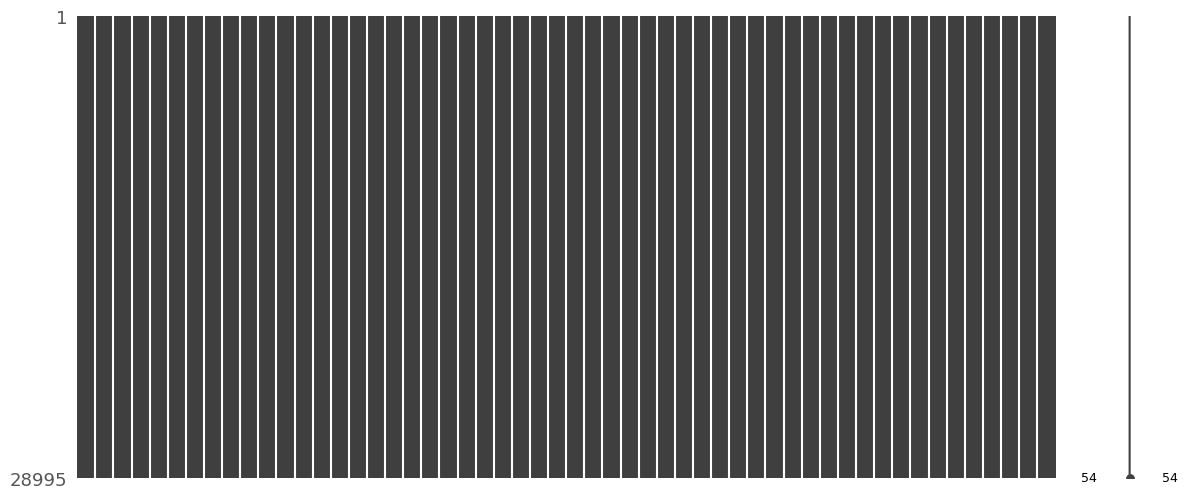

In [43]:
msno.matrix(df, figsize=(14,6),fontsize=11);

## Selecting features for model

Features are selected for use in predictive models. Features that are redundant, have been encoded, or have been engineered into new features are not included in further analyses. Individual event performances are no longer considered, and the target is the total weight lifted normalized by athlete bodyweight.

In [44]:
df_select = df.drop(columns=['region','height','weight','candj','snatch','deadlift','norm_bs', 'norm_dl', 'norm_j', 'norm_s','bmi_rounded','backsq','eat','background','experience','schedule','howlong','gender'])
print('Selected features:\n',df_select.columns.values)

Selected features:
 ['age' 'rec' 'high_school' 'college' 'pro' 'no_background' 'exp_coach'
 'exp_alone' 'exp_courses' 'life_changing' 'exp_trainer' 'exp_level1'
 'exp_start_nr' 'rest_plus' 'rest_minus' 'rest_sched' 'sched_0extra'
 'sched_1extra' 'sched_2extra' 'sched_3extra' 'sched_nr' 'rest_nr'
 'exp_1to2yrs' 'exp_2to4yrs' 'exp_4plus' 'exp_6to12mo' 'exp_lt6mo'
 'eat_conv' 'eat_cheat' 'eat_quality' 'eat_paleo' 'eat_weigh' 'US'
 'gender_' 'total_lift' 'BMI']


In [46]:
## Random forest regression model

## Conclusion and recommendations

